In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

dFrame= pd.read_csv('classification_lab_data.csv')
#dFrame= pd.read_csv('classification_lab_data_holdout_features.csv')

***
***
# CLEANING / TRANSFORMATION
***
***

In [16]:
dFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23999 entries, 0 to 23998
Data columns (total 24 columns):
LIMIT_BAL                     23999 non-null int64
SEX                           23999 non-null int64
EDUCATION                     23999 non-null int64
MARRIAGE                      23999 non-null int64
AGE                           23999 non-null int64
PAY_1                         23999 non-null int64
PAY_2                         23999 non-null int64
PAY_3                         23999 non-null int64
PAY_4                         23999 non-null int64
PAY_5                         23999 non-null int64
PAY_6                         23999 non-null int64
BILL_AMT1                     23999 non-null int64
BILL_AMT2                     23999 non-null int64
BILL_AMT3                     23999 non-null int64
BILL_AMT4                     23999 non-null int64
BILL_AMT5                     23999 non-null int64
BILL_AMT6                     23999 non-null int64
PAY_AMT1                     

In [17]:
dFrame.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,0,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [18]:
dFrame= dFrame.rename(index= str, columns={'PAY_0': 'PAY_1'})
dFrame= dFrame.rename(index= str, columns={'default payment next month': 'DEFAULT'})

In [19]:
dFrame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,23999.0,167825.729405,129915.115993,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,23999.0,0.396392,0.489158,0.0,0.0,0.0,1.0,1.0
EDUCATION,23999.0,1.856786,0.791939,0.0,1.0,2.0,2.0,6.0
MARRIAGE,23999.0,1.550773,0.522431,0.0,1.0,2.0,2.0,3.0
AGE,23999.0,35.523230,9.253986,21.0,28.0,34.0,42.0,79.0
PAY_1,23999.0,-0.014959,1.120903,-2.0,-1.0,0.0,0.0,8.0
PAY_2,23999.0,-0.134839,1.193044,-2.0,-1.0,0.0,0.0,8.0
PAY_3,23999.0,-0.165632,1.193515,-2.0,-1.0,0.0,0.0,8.0
PAY_4,23999.0,-0.217092,1.168719,-2.0,-1.0,0.0,0.0,8.0
PAY_5,23999.0,-0.261344,1.133016,-2.0,-1.0,0.0,0.0,8.0


In [20]:
pd.set_option('display.max_columns', 50)

In [21]:
for i in range(len(dFrame)):
    if dFrame.SEX[i] == 2:
        dFrame.SEX[i] = 0

In [22]:
dFrame.EDUCATION.value_counts()

2    11188
1     8442
3     3994
5      223
4      100
6       41
0       11
Name: EDUCATION, dtype: int64

In [23]:
dFrame.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,0,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [24]:
dFrame.groupby(by='EDUCATION')['DEFAULT'].count()

EDUCATION
0       11
1     8442
2    11188
3     3994
4      100
5      223
6       41
Name: DEFAULT, dtype: int64

Add all out of range data in EDUCATION ('0', '5', '6') to EDUCATION '4' == others  
Add all out of range data in MARRIAGE ('0') to MARRIAGE '3' == others

In [25]:
for i in range(len(dFrame)):
    if dFrame.EDUCATION[i] == 0 or dFrame.EDUCATION[i] == 5 or dFrame.EDUCATION[i] == 6:
        dFrame.EDUCATION[i] = 4

In [26]:
for i in range(len(dFrame)):
    if dFrame.MARRIAGE[i] == 0:
        dFrame.MARRIAGE[i] = 3

In [27]:
#dFrame.groupby(by='MARRIAGE')['DEFAULT'].count()

In [28]:
dFrame[['EDUCATION', 'MARRIAGE']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EDUCATION,23999.0,1.845910,0.746305,1.0,1.0,2.0,2.0,4.0
MARRIAGE,23999.0,1.556148,0.521881,1.0,1.0,2.0,2.0,3.0


target variable
--------------------------------------------------------------------------------
DEFAULT
0    18691
1     5308
Name: DEFAULT, dtype: int64


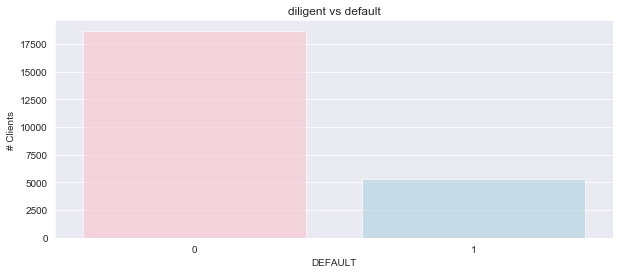

In [29]:
print('target variable')
print('--'*40)
print(dFrame.groupby(['DEFAULT']).DEFAULT.count())

plt.figure(figsize = (10,4))
sns.countplot(dFrame['DEFAULT'], alpha =.66, palette= ['pink','lightblue'])
plt.title('diligent vs default')
plt.ylabel('# Clients')
plt.show()

CONTINIOUS VS DISCRETE

In [30]:
# print('continious variable')
# display(dFrame[['AGE', 'PAY_AMT1']].describe().transpose())
# print('--'*30)
# print('discrete variables')
# print(dFrame.groupby('SEX').SEX.count())
# print(dFrame.groupby('EDUCATION').SEX.count())
# print(dFrame.groupby('MARRIAGE').SEX.count())

In [31]:
# print('Client SEX summary')

# print('\n')
# print(dFrame.groupby(['SEX','DEFAULT']).SEX.count().unstack())

# # Passenger class visualization
# # pclass = train_data.groupby(['Pclass','Survived']).Pclass.count().unstack()
# # p1 = pclass.plot(kind = 'bar', stacked = True, 
# #                    title = 'Passengers by Class: Survivors vs Non-Survivors', 
# #                    color = ['grey','lightgreen'], alpha = .70)
# # p1.set_xlabel('Pclass')
# # p1.set_ylabel('# Passengers')
# # p1.legend(['Did Not Survive','Survived'])
# # plt.show()

***
***
# FEATURE ENGINEERING
***
***

In [32]:
# add +1 to every entry
dFrame['PAY_1'] = dFrame['PAY_1'] + 1
dFrame['PAY_2'] = dFrame['PAY_2'] + 1
dFrame['PAY_3'] = dFrame['PAY_3'] + 1
dFrame['PAY_4'] = dFrame['PAY_4'] + 1
dFrame['PAY_5'] = dFrame['PAY_5'] + 1
dFrame['PAY_6'] = dFrame['PAY_6'] + 1

In [33]:
# split in two groups
for i in range(len(dFrame)):
    if dFrame.PAY_1[i] == -1 or dFrame.PAY_1[i] == 0 or dFrame.PAY_1[i] == 1:
        dFrame.PAY_1[i] = 0
    else:
        dFrame.PAY_1[i] = 1

In [34]:
for i in range(len(dFrame)):
    if dFrame.PAY_2[i] == -1 or dFrame.PAY_2[i] == 0 or dFrame.PAY_2[i] == 1:
        dFrame.PAY_2[i] = 0
    else:
        dFrame.PAY_2[i] = 1

In [35]:
for i in range(len(dFrame)):
    if dFrame.PAY_3[i] == -1 or dFrame.PAY_3[i] == 0 or dFrame.PAY_3[i] == 1:
        dFrame.PAY_3[i] = 0
    else:
        dFrame.PAY_3[i] = 1

In [36]:
for i in range(len(dFrame)):
    if dFrame.PAY_4[i] == -1 or dFrame.PAY_4[i] == 0 or dFrame.PAY_4[i] == 1:
        dFrame.PAY_4[i] = 0
    else:
        dFrame.PAY_4[i] = 1

In [37]:
for i in range(len(dFrame)):
    if dFrame.PAY_5[i] == -1 or dFrame.PAY_5[i] == 0 or dFrame.PAY_5[i] == 1:
        dFrame.PAY_5[i] = 0
    else:
        dFrame.PAY_5[i] = 1

In [38]:
for i in range(len(dFrame)):
    if dFrame.PAY_6[i] == -1 or dFrame.PAY_6[i] == 0 or dFrame.PAY_6[i] == 1:
        dFrame.PAY_6[i] = 0
    else:
        dFrame.PAY_6[i] = 1

In [39]:
# calculate payment/bill ratio
dFrame['BILL_RATIO_SEP']= dFrame['PAY_AMT1']/dFrame['BILL_AMT2']
dFrame['BILL_RATIO_AUG']= dFrame['PAY_AMT2']/dFrame['BILL_AMT3']
dFrame['BILL_RATIO_JUL']= dFrame['PAY_AMT3']/dFrame['BILL_AMT4']
dFrame['BILL_RATIO_JUN']= dFrame['PAY_AMT4']/dFrame['BILL_AMT5']
dFrame['BILL_RATIO_MAY']= dFrame['PAY_AMT5']/dFrame['BILL_AMT6']

In [40]:
#dFrame.fillna(0, inplace= True)

In [41]:
dFrame.replace([np.inf, -np.inf], np.nan, inplace= True)

In [42]:
dFrame.fillna(0, inplace= True)

In [43]:
dFrame= dFrame.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis= 1)
dFrame= dFrame.drop(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis= 1)


In [44]:
dFrame.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT,BILL_RATIO_SEP,BILL_RATIO_AUG,BILL_RATIO_JUL,BILL_RATIO_JUN,BILL_RATIO_MAY
0,50000,1,2,2,49,0,0,0,0,0,0,1,0.031463,0.030160,0.027727,0.100585,0.031206
1,30000,1,2,1,39,0,0,0,0,0,0,0,0.090381,0.103772,0.121440,0.028425,0.133761
2,260000,1,1,2,27,0,0,0,0,0,0,0,0.231132,0.040621,0.044460,0.045825,0.045996
3,200000,0,2,1,33,0,0,0,0,0,0,0,0.154178,0.074107,0.023775,0.135556,0.290402
4,50000,1,1,2,27,0,0,0,0,0,0,0,0.099731,0.078203,0.090013,0.035769,0.036307


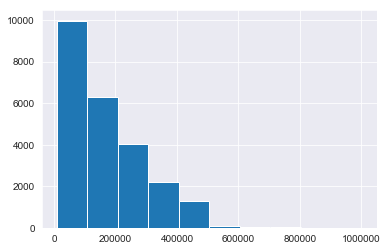

In [45]:
dFrame.LIMIT_BAL.hist();

In [46]:
labels = [0, 1, 2, 3, 4, 5]

In [47]:
dFrame['LIMIT_BIN'] = pd.cut(dFrame['LIMIT_BAL'], bins=6, labels=labels)

In [48]:
edu_dummies = pd.get_dummies(dFrame.EDUCATION, prefix="EDU")

In [49]:
marriage_dummies = pd.get_dummies(dFrame.MARRIAGE, prefix="MARR")

In [50]:
limit_dummies = pd.get_dummies(dFrame.LIMIT_BIN, prefix="LIM")

In [51]:
dFrame = pd.concat([dFrame, edu_dummies, marriage_dummies, limit_dummies], axis=1)

In [52]:
dFrame.drop(['EDUCATION', 'MARRIAGE', 'LIMIT_BAL', 'LIMIT_BIN'], axis=1, inplace=True)

In [53]:
dFrame.head()

,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT,BILL_RATIO_SEP,BILL_RATIO_AUG,BILL_RATIO_JUL,BILL_RATIO_JUN,BILL_RATIO_MAY,EDU_1,EDU_2,EDU_3,EDU_4,MARR_1,MARR_2,MARR_3,LIM_0,LIM_1,LIM_2,LIM_3,LIM_4,LIM_5
0,1,49,0,0,0,0,0,0,1,0.031463,0.030160,0.027727,0.100585,0.031206,0,1,0,0,0,1,0,1,0,0,0,0,0
1,1,39,0,0,0,0,0,0,0,0.090381,0.103772,0.121440,0.028425,0.133761,0,1,0,0,1,0,0,1,0,0,0,0,0
2,1,27,0,0,0,0,0,0,0,0.231132,0.040621,0.044460,0.045825,0.045996,1,0,0,0,0,1,0,0,1,0,0,0,0
3,0,33,0,0,0,0,0,0,0,0.154178,0.074107,0.023775,0.135556,0.290402,0,1,0,0,1,0,0,0,1,0,0,0,0
4,1,27,0,0,0,0,0,0,0,0.099731,0.078203,0.090013,0.035769,0.036307,1,0,0,0,0,1,0,1,0,0,0,0,0


In [54]:
dFrame.shape

(23999, 27)

***
***
# MODELLING
***
***

In [55]:
# import classes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
X= dFrame.drop(['DEFAULT'], axis=1)
y= dFrame['DEFAULT']

In [57]:
X.shape, y.shape

((23999, 26), (23999,))

***
# FEATURE SELECTION
***

In [58]:
# import
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  chi2, f_classif, mutual_info_classif

In [59]:
# X= SelectKBest(mutual_info_classif).fit_transform(X, y)
# X= SelectKBest(f_classif).fit_transform(X, y)
#X= SelectKBest(chi2, k= all).fit_transform(X, y)
# X= pd.DataFrame(X)

In [60]:
X.shape, y.shape

((23999, 26), (23999,))

***
# SPLITING
***

In [61]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 999, test_size= .3)

## PART_0: W/O SAMPLING

In [62]:
# import a class
from sklearn.preprocessing import StandardScaler

In [63]:
scaler= StandardScaler()

scaler.fit(X_train)
X_train= scaler.transform(X_train)

scaler.fit(X_test)
X_test= scaler.transform(X_test)

# KNN

In [64]:
# import a class
from sklearn.neighbors import KNeighborsClassifier

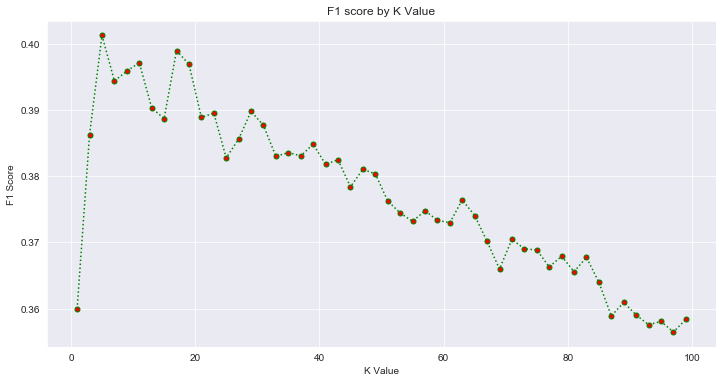

F1_score max:0.4013 where K: 5


In [65]:
# loop to find k
k_scores = []
k_range= list(range(1, 100, 2))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, p=2)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    k_scores.append(f1_score(y_test, y_pred_k, pos_label= 1))

# plot
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='green', linestyle=':', marker='o',  
         markerfacecolor='red', markersize=5)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# display parametrs 
print(f'F1_score max:{round(max(k_scores), 4)} where K: {(k_scores.index(max(k_scores))+1)*2 - 1}')
k= (k_scores.index(max(k_scores))+1)*2 - 1

In [66]:
# instantiate a model
knn= KNeighborsClassifier(n_neighbors= k, p=2)

# train a model
knn= knn.fit(X_train, y_train)

# predict on test set
y_pred= knn.predict(X_test)

print('TEST_#__: KNN')
print('--'*30)
print('CONFUSION_MATRIX')
print('--'*30)
print(confusion_matrix(y_test, y_pred))
print('--'*30)
print('CLASSIFICATION_REPORT')
print('--'*30)
print(classification_report(y_test, y_pred, output_dict= False))
print('--'*30)

p0t1= round(f1_score(y_test, y_pred), 3)
k01= knn.get_params()['n_neighbors']

TEST_#__: KNN
------------------------------------------------------------
CONFUSION_MATRIX
------------------------------------------------------------
[[5188  455]
 [1052  505]]
------------------------------------------------------------
CLASSIFICATION_REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      5643
           1       0.53      0.32      0.40      1557

    accuracy                           0.79      7200
   macro avg       0.68      0.62      0.64      7200
weighted avg       0.77      0.79      0.77      7200

------------------------------------------------------------


# LOGISTIC REGRESION

In [67]:
# import a model
from sklearn.linear_model import LogisticRegression

In [68]:
#instantiate a model
logreg= LogisticRegression(solver= 'lbfgs')

#train a model
logreg= logreg.fit(X_train, y_train)

#predict
y_pred= logreg.predict(X_test)

print('TEST_#__: LOGISTIC_REGRESSION')
print('--'*40)
print('CONFUSION_MATRIX')
print('--'*40)
print(confusion_matrix(y_test, y_pred))
print('--'*40)
print('CLASSIFICATION_REPORT')
print('--'*40)
print(classification_report(y_test, y_pred, output_dict= False))
print('--'*40)

p0t2= round(f1_score(y_test, y_pred), 3)

TEST_#__: LOGISTIC_REGRESSION
--------------------------------------------------------------------------------
CONFUSION_MATRIX
--------------------------------------------------------------------------------
[[5382  261]
 [1116  441]]
--------------------------------------------------------------------------------
CLASSIFICATION_REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5643
           1       0.63      0.28      0.39      1557

    accuracy                           0.81      7200
   macro avg       0.73      0.62      0.64      7200
weighted avg       0.78      0.81      0.78      7200

--------------------------------------------------------------------------------


# DECISION TREE

In [69]:
#import a model
from sklearn.tree import DecisionTreeClassifier

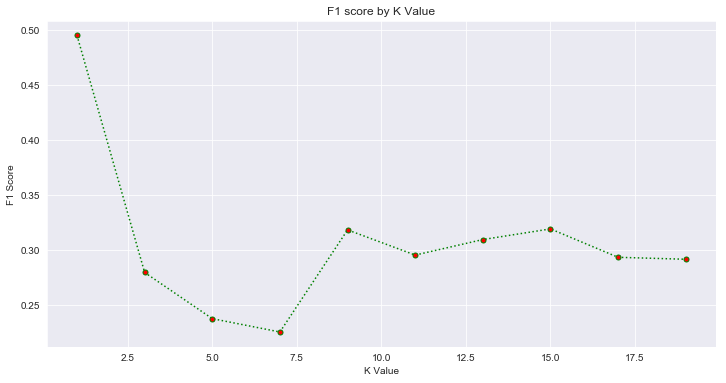

f1_score max:0.4953 where D: 1


In [70]:
# loop to find depth
depth_scores = []
depth_range= list(range(1, 20, 2))
for d in depth_range:
    dtree= DecisionTreeClassifier(max_depth= d, splitter= 'best')
    dtree.fit(X_train, y_train)
    y_pred_d = dtree.predict(X_test)
    depth_scores.append(f1_score(y_test, y_pred_d, pos_label= 1))

# plot
plt.figure(figsize=(12, 6))  
plt.plot(depth_range, depth_scores, color='green', linestyle=':', marker='o',  
         markerfacecolor='red', markersize=5)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# display parametrs 
print(f'f1_score max:{round(max(depth_scores), 4)} where D: {(depth_scores.index(max(depth_scores))+1)*2 - 1}')
d= (depth_scores.index(max(depth_scores))+1)*2 - 1

In [71]:
# instantiate a model
dtree= DecisionTreeClassifier(max_depth= d, splitter= 'best')

#train a model
dtree= dtree.fit(X_train, y_train)

# predict
y_pred= dtree.predict(X_test)

print('TEST_#__: DECISION_TREE')
print('--'*40)
print('CONFUSION_MATRIX')
print('--'*40)
print(confusion_matrix(y_test, y_pred))
print('--'*40)
print('CLASSIFICATION_REPORT')
print('--'*40)
print(classification_report(y_test, y_pred, output_dict= False))
print('--'*40)

p0t3= round(f1_score(y_test, y_pred), 3)

TEST_#__: DECISION_TREE
--------------------------------------------------------------------------------
CONFUSION_MATRIX
--------------------------------------------------------------------------------
[[4812  831]
 [ 771  786]]
--------------------------------------------------------------------------------
CLASSIFICATION_REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5643
           1       0.49      0.50      0.50      1557

    accuracy                           0.78      7200
   macro avg       0.67      0.68      0.68      7200
weighted avg       0.78      0.78      0.78      7200

--------------------------------------------------------------------------------


***
_HANDLING IMBALANCES_
***

In [72]:
X= dFrame.drop(['DEFAULT'], axis=1)
y= dFrame['DEFAULT']

In [73]:
#X_train= pd.DataFrame(X_train)

In [74]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 999, test_size= .3)

In [75]:
# concatenate our training data back together
temp= pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
zero = temp[temp['DEFAULT']==0]
one = temp[temp['DEFAULT']==1]

# get a class count to understand the class imbalance.
print('zero count: '+ str(len(zero)))
print('one count: '+ str(len(one)))

zero count: 13048
one count: 3751


## PART_1: UPSAMPLING ##

In [76]:
from sklearn.utils import resample

In [69]:
# upsample minority
one_upsampled = resample(one, replace=True, n_samples=len(zero), random_state=999)

# combine majority and upsampled minority
upsampled = pd.concat([zero, one_upsampled])

# check new class counts
print(upsampled['DEFAULT'].value_counts())

# try a model again with the balanced dataset
y_train = upsampled['DEFAULT']
X_train = upsampled.drop(['DEFAULT'], axis=1)

1    13048
0    13048
Name: DEFAULT, dtype: int64


In [70]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)

scaler.fit(X_test)
X_test= scaler.transform(X_test)

# KNN #
---

In [91]:
# instantiate a model
knn= KNeighborsClassifier(n_neighbors= 185, p=2)

# train a model
knn= knn.fit(X_train, y_train)

# predict on test set
y_pred= knn.predict(X_test)

print('TEST_#__: KNN')
print('--'*40)
print('CONFUSION_MATRIX')
print('--'*40)
print(confusion_matrix(y_test, y_pred))
print('--'*40)
print('CLASSIFICATION_REPORT')
print('--'*40)
print(classification_report(y_test, y_pred, output_dict= False))
print('--'*40)

p1t1= round(f1_score(y_test, y_pred), 3)
k04= knn.get_params()['n_neighbors']

TEST_#__: KNN
--------------------------------------------------------------------------------
CONFUSION_MATRIX
--------------------------------------------------------------------------------
[[4855  788]
 [ 769  788]]
--------------------------------------------------------------------------------
CLASSIFICATION_REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5643
           1       0.50      0.51      0.50      1557

    accuracy                           0.78      7200
   macro avg       0.68      0.68      0.68      7200
weighted avg       0.78      0.78      0.78      7200

--------------------------------------------------------------------------------


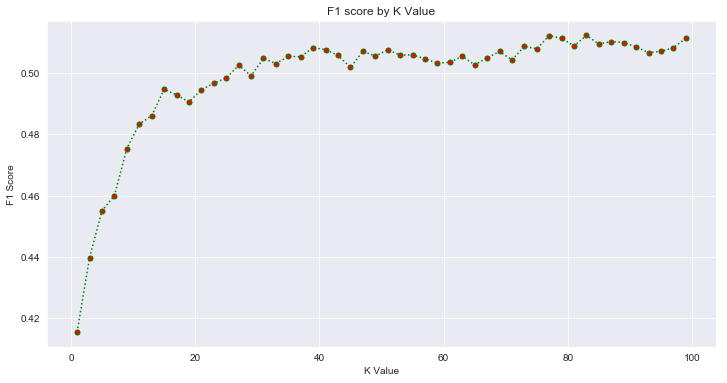

F1_score max:0.5123 where K: 83


In [85]:
# loop to find k
k_scores = []
k_range= list(range(1, 100, 2))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, p=2)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    k_scores.append(f1_score(y_test, y_pred_k, pos_label= 1))

# plot
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='green', linestyle=':', marker='o',  
         markerfacecolor='red', markersize=5)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# display parametrs 
print(f'F1_score max:{round(max(k_scores), 4)} where K: {(k_scores.index(max(k_scores))+1)*2 - 1}')

# LOGISTIC REGRESSION #

In [86]:
#instantiate a model
logreg= LogisticRegression(solver= 'lbfgs')

#train a model
logreg= logreg.fit(X_train, y_train)

#predict
y_pred= logreg.predict(X_test)

In [87]:
print('TEST_#__: LOGISTIC_REGRESSION')
print('--'*40)
print('CONFUSION_MATRIX')
print('--'*40)
print(confusion_matrix(y_test, y_pred))
print('--'*40)
print('CLASSIFICATION_REPORT')
print('--'*40)
print(classification_report(y_test, y_pred, output_dict= False))
print('--'*40)

p1t2= round(f1_score(y_test, y_pred), 3)

TEST_#__: LOGISTIC_REGRESSION
--------------------------------------------------------------------------------
CONFUSION_MATRIX
--------------------------------------------------------------------------------
[[4434 1209]
 [ 601  956]]
--------------------------------------------------------------------------------
CLASSIFICATION_REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      5643
           1       0.44      0.61      0.51      1557

    accuracy                           0.75      7200
   macro avg       0.66      0.70      0.67      7200
weighted avg       0.79      0.75      0.76      7200

--------------------------------------------------------------------------------


# DECISION TREE #

In [88]:
# instantiate a model
dtree= DecisionTreeClassifier(max_depth= 3, splitter= 'best')

#train a model
dtree= dtree.fit(X_train, y_train)

# predict
y_pred= dtree.predict(X_test)

print('TEST_#__: DECISION_TREE')
print('--'*40)
print('CONFUSION_MATRIX')
print('--'*40)
print(confusion_matrix(y_test, y_pred))
print('--'*40)
print('CLASSIFICATION_REPORT')
print('--'*40)
print(classification_report(y_test, y_pred, output_dict= False))
print('--'*40)

p1t3= round(f1_score(y_test, y_pred), 3)

TEST_#__: DECISION_TREE
--------------------------------------------------------------------------------
CONFUSION_MATRIX
--------------------------------------------------------------------------------
[[4568 1075]
 [ 653  904]]
--------------------------------------------------------------------------------
CLASSIFICATION_REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      5643
           1       0.46      0.58      0.51      1557

    accuracy                           0.76      7200
   macro avg       0.67      0.70      0.68      7200
weighted avg       0.78      0.76      0.77      7200

--------------------------------------------------------------------------------


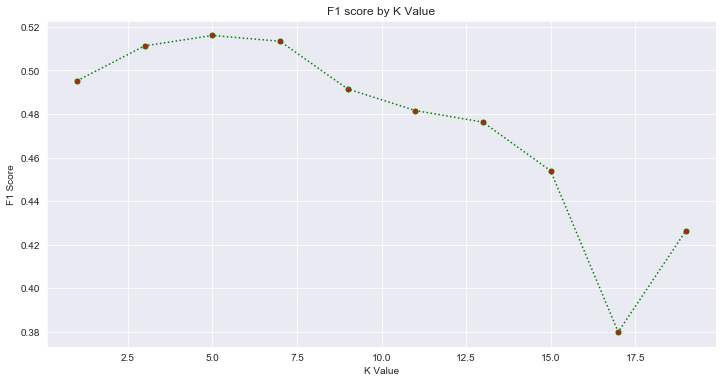

f1_score max:0.5161 where D: 5


In [89]:
# loop to find depth
depth_scores = []
depth_range= list(range(1, 20, 2))
for d in depth_range:
    dtree= DecisionTreeClassifier(max_depth= d, splitter= 'best')
    dtree.fit(X_train, y_train)
    y_pred_d = dtree.predict(X_test)
    depth_scores.append(f1_score(y_test, y_pred_d, pos_label= 1))

# plot
plt.figure(figsize=(12, 6))  
plt.plot(depth_range, depth_scores, color='green', linestyle=':', marker='o',  
         markerfacecolor='red', markersize=5)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# display parametrs 
print(f'f1_score max:{round(max(depth_scores), 4)} where D: {(depth_scores.index(max(depth_scores))+1)*2 - 1}')

## PART_2: DOWNSAMPLING ##

In [77]:
# downsample majority
one_downsampled = resample(zero, replace = False, n_samples = len(one), random_state = 999)

# combine minority and downsampled majority
downsampled = pd.concat([one_downsampled, one])

# checking counts
print(downsampled['DEFAULT'].value_counts())

# trying a model again with the balanced dataset
y_train = downsampled['DEFAULT']
X_train = downsampled.drop(['DEFAULT'], axis=1)

1    3751
0    3751
Name: DEFAULT, dtype: int64


In [78]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
scaler.fit(X_test)
X_test= scaler.transform(X_test)

# KNN #

In [79]:
# instantiate a model
knn= KNeighborsClassifier(n_neighbors= 750, p=1)

# train a model
knn= knn.fit(X_train, y_train)

# predict on test set
y_pred= knn.predict(X_test)

print('TEST_#__: KNN')
print('--'*40)
print('CONFUSION_MATRIX')
print('--'*40)
print(confusion_matrix(y_test, y_pred))
print('--'*40)
print('CLASSIFICATION_REPORT')
print('--'*40)
print(classification_report(y_test, y_pred, output_dict= False))
print('--'*40)

p2t1= round(f1_score(y_test, y_pred), 3)
k07= knn.get_params()['n_neighbors']

TEST_#__: KNN
--------------------------------------------------------------------------------
CONFUSION_MATRIX
--------------------------------------------------------------------------------
[[5076  567]
 [ 878  679]]
--------------------------------------------------------------------------------
CLASSIFICATION_REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      5643
           1       0.54      0.44      0.48      1557

    accuracy                           0.80      7200
   macro avg       0.70      0.67      0.68      7200
weighted avg       0.79      0.80      0.79      7200

--------------------------------------------------------------------------------


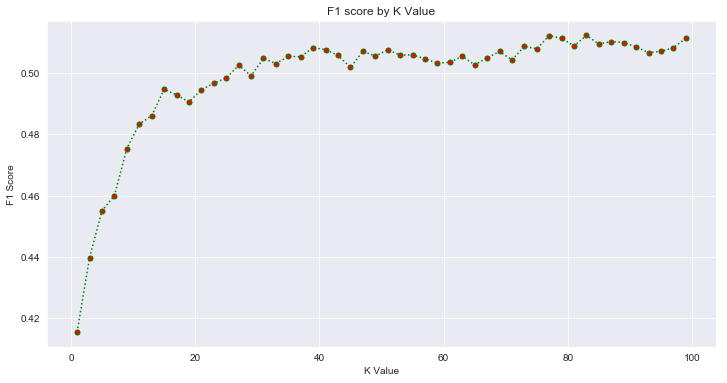

F1_score max:0.5123 where K: 83


In [80]:
# loop to find k
k_scores = []
k_range= list(range(1, 100, 2))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, p=2)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    k_scores.append(f1_score(y_test, y_pred_k, pos_label= 1))

# plot
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='green', linestyle=':', marker='o',  
         markerfacecolor='red', markersize=5)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# display parametrs 
print(f'F1_score max:{round(max(k_scores), 4)} where K: {(k_scores.index(max(k_scores))+1)*2 - 1}')

# LOGISTIC REGRESSION #

In [81]:
#instantiate a model
logreg= LogisticRegression(solver= 'lbfgs')

#train a model
logreg= logreg.fit(X_train, y_train)

#predict
y_pred= logreg.predict(X_test)

print('TEST_#__: LOGISTIC_REGRESSION')
print('CONFUSION_MATRIX')
print('--'*40)
print(confusion_matrix(y_test, y_pred))
print('--'*40)
print('CLASSIFICATION_REPORT')
print('--'*40)
print(classification_report(y_test, y_pred, output_dict= False))
print('--'*40)

p2t2= round(f1_score(y_test, y_pred), 3)

TEST_#__: LOGISTIC_REGRESSION
CONFUSION_MATRIX
--------------------------------------------------------------------------------
[[4434 1209]
 [ 601  956]]
--------------------------------------------------------------------------------
CLASSIFICATION_REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      5643
           1       0.44      0.61      0.51      1557

    accuracy                           0.75      7200
   macro avg       0.66      0.70      0.67      7200
weighted avg       0.79      0.75      0.76      7200

--------------------------------------------------------------------------------


# DECISION TREE #

In [82]:
# instantiate a model
dtree= DecisionTreeClassifier(max_depth= 3, splitter= 'best')

#train a model
dtree= dtree.fit(X_train, y_train)

# predict
y_pred= dtree.predict(X_test)

print('TEST_#__: DECISION_TREE')
print('CONFUSION_MATRIX')
print('--'*40)
print(confusion_matrix(y_test, y_pred))
print('--'*40)
print('CLASSIFICATION_REPORT')
print('--'*40)
print(classification_report(y_test, y_pred, output_dict= False))
print('--'*40)

p2t3= round(f1_score(y_test, y_pred), 3)

TEST_#__: DECISION_TREE
CONFUSION_MATRIX
--------------------------------------------------------------------------------
[[4568 1075]
 [ 653  904]]
--------------------------------------------------------------------------------
CLASSIFICATION_REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      5643
           1       0.46      0.58      0.51      1557

    accuracy                           0.76      7200
   macro avg       0.67      0.70      0.68      7200
weighted avg       0.78      0.76      0.77      7200

--------------------------------------------------------------------------------


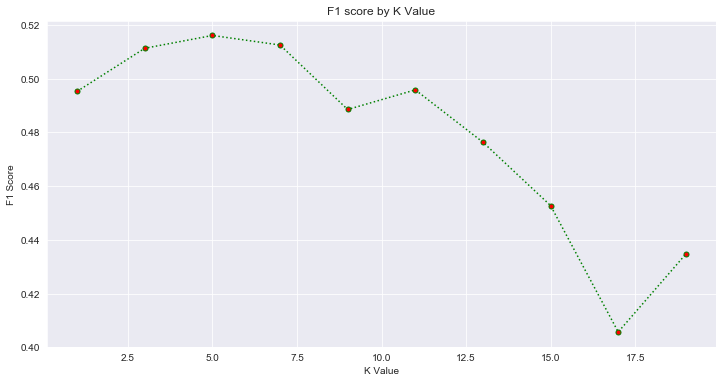

f1_score max:0.5161 where D: 5


In [83]:
# loop to find depth
depth_scores = []
depth_range= list(range(1, 20, 2))
for d in depth_range:
    dtree= DecisionTreeClassifier(max_depth= d, splitter= 'best')
    dtree.fit(X_train, y_train)
    y_pred_d = dtree.predict(X_test)
    depth_scores.append(f1_score(y_test, y_pred_d, pos_label= 1))

# plot
plt.figure(figsize=(12, 6))  
plt.plot(depth_range, depth_scores, color='green', linestyle=':', marker='o',  
         markerfacecolor='red', markersize=5)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# display parametrs 
print(f'f1_score max:{round(max(depth_scores), 4)} where D: {(depth_scores.index(max(depth_scores))+1)*2 - 1}')

# *** #
# CONCLUSION #
# *** #

In [92]:
print(':'*40)
print('CONSOLIDATED_TABLE')
print(':'*40)
print('--'*20)
print(f'F1_score for KNN with K {k01}:{p0t1}')
print('--'*20)
print(f'F1_score for LOGREG: {p0t2}')
print('--'*20)
print(f'F1_score for DTREE with D 1:{p0t3}')
print(':'*40)
print('UPSAMPLING')
print(':'*40)
print(f'F1_score for KNN with K {k04}: {p1t1}')
print('--'*20)
print(f'F1_score for LOGREG: {p1t2}')
print('--'*20)
print(f'F1_score for DTREE with D 3:{p1t3}')
print(':'*40)
print('DOWNSAMPLING')
print(':'*40)
print('--'*20)
print(f'F1_score for KNN with K {k07}:{p2t1}')
print('--'*20)
print(f'F1_score for LOGREG:{p2t2}')
print('--'*20)
print(f'F1_score for DTREE with D 3:{p2t3}')

::::::::::::::::::::::::::::::::::::::::
CONSOLIDATED_TABLE
::::::::::::::::::::::::::::::::::::::::
----------------------------------------
F1_score for KNN with K 5:0.401
----------------------------------------
F1_score for LOGREG: 0.39
----------------------------------------
F1_score for DTREE with D 1:0.495
::::::::::::::::::::::::::::::::::::::::
UPSAMPLING
::::::::::::::::::::::::::::::::::::::::
F1_score for KNN with K 185: 0.503
----------------------------------------
F1_score for LOGREG: 0.514
----------------------------------------
F1_score for DTREE with D 3:0.511
::::::::::::::::::::::::::::::::::::::::
DOWNSAMPLING
::::::::::::::::::::::::::::::::::::::::
----------------------------------------
F1_score for KNN with K 750:0.484
----------------------------------------
F1_score for LOGREG:0.514
----------------------------------------
F1_score for DTREE with D 3:0.511
